In [6]:
from astropy.io import fits
import os
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord, Galactic
import healpy as hp
import sys
sys.path.append('/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/scripts/')
import HSCMeasurementUtils
import healsparse

In [7]:
path = '/global/cfs/projectdirs/lsst/groups/LSS/HSC_reanalysis/data_javi/lens_sample_2023_pdr1'
path_save = '/pscratch/sd/d/davidsan/HSC-PDR1-3x2pt-harmonic-methods/data/mask/'

gama09h_pdr1.fits
Number of observed objects = 6496607
Number of stars = 1128219 (0.17366280583079752)


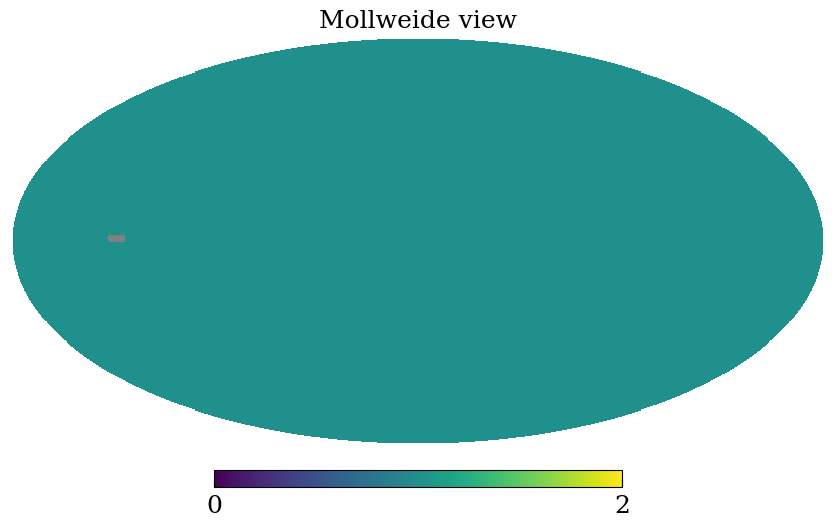

setting the output map dtype to [dtype('float64')]


gama15h_pdr1.fits


In [ ]:
nside = 4096

fname_list = ['gama09h_pdr1.fits', 'gama15h_pdr1.fits', 'wide12h_pdr1.fits', 'xmm_pdr1.fits', 'vvds_pdr1.fits']
label_list = ['gama09h', 'gama15h', 'wide12h', 'xmm', 'vvds']

for fname, label in zip(fname_list, label_list):
    print(fname)
    fname = os.path.join(path, fname)
    hdul = fits.open(fname)
    data = hdul[1].data
    header = hdul[1].header
    
    stars_cond = data['iclassification_extendedness'] == 0
    no_stars_cond = (data['iclassification_extendedness'] != 0) * (~np.isnan(data['iclassification_extendedness']))
    
    ra = data['ra']
    print(f'Number of observed objects = {len(ra)}')
    dec = data['dec']

    ra_stars = ra[stars_cond]
    print(f'Number of stars = {sum(stars_cond)} ({sum(stars_cond) / len(ra)})')
    dec_stars = dec[stars_cond]

    ra_no_stars = ra[no_stars_cond]
    dec_no_stars = dec[no_stars_cond]
    
    # Create a SkyCoord object with RA and Dec
    pix_indices = HSCMeasurementUtils.RaDecToIndex(ra_deg = ra_stars,
                                                   dec_deg = dec_stars,
                                                   nside = nside)
    mask = np.ones(12 * nside ** 2)
    mask[pix_indices] *= hp.UNSEEN
    hp.mollview(mask, nest=False)
    plt.show()
    plt.close()
    # Save
    hp.write_map(os.path.join(path_save,f'masked_fraction_nside{nside}_{label}.fits'), mask,overwrite=True)

    # To create a new map, the resolutions and datatype must be specified
    nside_coverage = 32
    nside_sparse = 4096
    map3 = healsparse.HealSparseMap.make_empty(nside_coverage, nside_sparse, np.float64)
    map3.update_values_pix(np.arange(12*nside_sparse**2), mask, nest=True)
    # In healsparse format
    map3.write(os.path.join(path_save,f'masked_fraction_nside4096_{label}.hs'), clobber=True)